# Data Anaysis

## duration_precipitation, daily_precipitation (lots of null filled with zero)

In [8]:
from util.build_dataset import build_origin_weather

origin_w, o_key = build_origin_weather(date="201908")

2020-04-06 02:27:38:manager:<INFO> 1 files is loaded from public_data/open_data_terrestrial_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'
2020-04-06 02:27:38:manager:<INFO> 1 files is loaded from public_data/open_data_marine_weather/origin/csv/2014-2020.csv in s3 'production-bobsim'


In [16]:
preci = origin_w[["강수 계속시간(hr)", "일강수량(mm)"]]
preci.head(3)

,강수 계속시간(hr),일강수량(mm)
0,NaN,0.3
1,NaN,0.3
2,NaN,0.3


In [18]:
from util.handle_null import NullHandler
filled = NullHandler.fillna_with_zero(precipitation)
filled.head(3)

,강수 계속시간(hr),일강수량(mm)
0,0.0,0.3
1,0.0,0.3
2,0.0,0.3


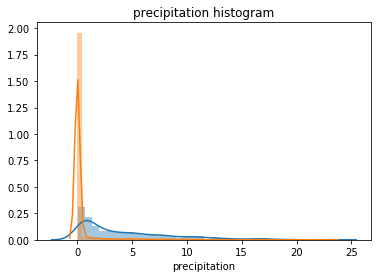

In [20]:
from util.visualize import show_hist
show_hist([preci["강수 계속시간(hr)"], filled["강수 계속시간(hr)"]], name="precipitation")

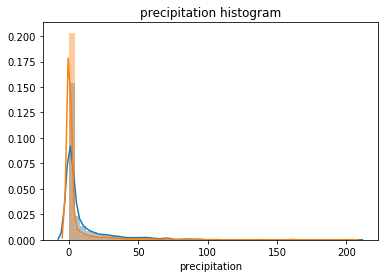

In [22]:
show_hist([preci["일강수량(mm)"], filled["일강수량(mm)"]], name="precipitation")

In [ ]:
show_hist([preci["일강수량(mm)"],

In [33]:
from util.build_dataset import build_process_price, build_origin_price

p_df, p_key = build_origin_price(date="201908", prefix="clean")
p_df.info()

2020-04-06 02:43:30:manager:<INFO> 1 files is loaded from public_data/open_data_raw_material_price/origin/csv/201908.csv in s3 'production-bobsim'
2020-04-06 02:43:30:core:<INFO> no missing value at raw material price


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40512 entries, 0 to 40511
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   조사일자    40512 non-null  datetime64[ns]
 1   조사지역명   40512 non-null  object        
 2   품목명     40512 non-null  object        
 3   당일조사가격  40512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB


In [55]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
p_df.groupby("품목명").count().sort_values(by="조사일자")

,조사일자,조사지역명,당일조사가격
품목명,,,
오렌지오렌지네블네이블,9,9,9
고추건고추햇양건고추햇산양건,92,92,92
고추건고추햇화건고추햇산화건,96,96,96
한우쇠고기갈비한우갈비,101,101,101
갈치류갈치은갈치생선,112,112,112
고등어류고등어망치고등어냉동,127,127,127
갈치류갈치은갈치냉동,133,133,133
고등어류고등어고등어(수입)수입,139,139,139
체리체리체리(수입)수입,142,142,142


In [49]:
from util.transform import CustomTransformer
from sklearn.preprocessing import OneHotEncoder

e = OneHotEncoder()
result =e.fit_transform(p_df["품목명"].to_frame())
print(result)

  (0, 2)	1.0
  (1, 5)	1.0
  (2, 15)	1.0
  (3, 16)	1.0
  (4, 17)	1.0
  (5, 20)	1.0
  (6, 28)	1.0
  (7, 30)	1.0
  (8, 31)	1.0
  (9, 32)	1.0
  (10, 33)	1.0
  (11, 40)	1.0
  (12, 48)	1.0
  (13, 51)	1.0
  (14, 53)	1.0
  (15, 57)	1.0
  (16, 61)	1.0
  (17, 86)	1.0
  (18, 92)	1.0
  (19, 95)	1.0
  (20, 97)	1.0
  (21, 99)	1.0
  (22, 100)	1.0
  (23, 34)	1.0
  (24, 42)	1.0
  :	:
  (40487, 38)	1.0
  (40488, 59)	1.0
  (40489, 89)	1.0
  (40490, 101)	1.0
  (40491, 37)	1.0
  (40492, 70)	1.0
  (40493, 75)	1.0
  (40494, 19)	1.0
  (40495, 44)	1.0
  (40496, 62)	1.0
  (40497, 90)	1.0
  (40498, 46)	1.0
  (40499, 93)	1.0
  (40500, 10)	1.0
  (40501, 76)	1.0
  (40502, 22)	1.0
  (40503, 79)	1.0
  (40504, 80)	1.0
  (40505, 81)	1.0
  (40506, 87)	1.0
  (40507, 91)	1.0
  (40508, 85)	1.0
  (40509, 21)	1.0
  (40510, 54)	1.0
  (40511, 13)	1.0


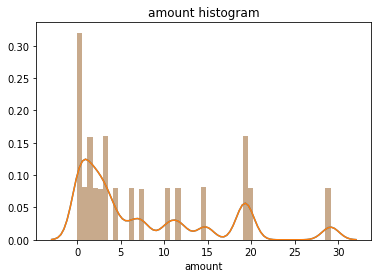

In [7]:
from util.visualize import show_hist

show_hist([filter_origin_df["일강수량(mm)"], clean_origin_df["일강수량(mm)"]], name="amount")

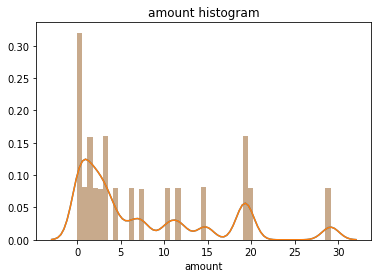

In [8]:
show_hist([filter_origin_df["일강수량(mm)"], clean_origin_df["일강수량(mm)"]], name="amount")

In [ ]:
show_hist(ser=filter_origin_df["강수 계속시간(hr)"], name="time")